In [5]:
import torch
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image

from utils.nms import non_max_suppression 
from utils.convert_box import xyxy2xywh 

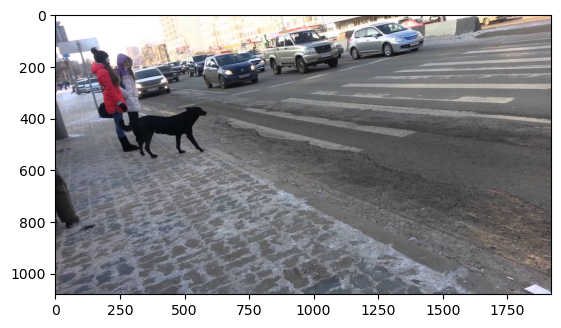

In [7]:
img = Image.open ('/Users/alexeyfilichkin/Desktop/PyTorch/segmentation/CVAT/9.jpeg').convert('RGB' )
#  pred = torch.load('pred.pt')
plt.imshow(img)
plt.show()